In [1]:
import os
import datetime

from io import BytesIO

import matplotlib.pyplot as plt
import modal
import numpy as np
from PIL import Image
import supervision as sv
import cv2

In [2]:
def visualize_and_save_annotations(
    img_name,
    image_pil, 
    segmentation_results, 
    output_dir="./output", 
    function_name="segment", 
    show_plot=True
):
    if segmentation_results[0]["labels"] == []:
        print("No segmentation results found.")
        return None
    # Extract data from segmentation_results
    masks = segmentation_results[0]['masks']
    boxes = segmentation_results[0]['boxes']
    scores = segmentation_results[0]['scores']
    labels = segmentation_results[0]['labels']
    
    # Convert masks to boolean format if needed
    if isinstance(masks, np.ndarray) and masks.dtype != bool:
        boolean_masks = masks.astype(bool)
    else:
        boolean_masks = masks
    
    # Create class_id for each unique label
    print("labels found:", labels)
    unique_labels = list(set(labels))
    print("unique labels found:", unique_labels)
    class_id_map = {label: idx for idx, label in enumerate(unique_labels)}
    print("class_id_map:", class_id_map)
    class_id = np.array([class_id_map[label] for label in labels])
    print("class_id:", class_id)

    # Format labels to include confidence scores
    formatted_labels = [f"{label}: {score:.2f}" for label, score in zip(labels, scores)]

    # Convert to supervision's detection format
    detections = sv.Detections(
        xyxy=boxes,
        mask=boolean_masks,
        confidence=scores,
        class_id=class_id
    )
    
    # Create annotators
    box_annotator = sv.BoxAnnotator()
    mask_annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()
    
    
    # Create a copy of the original image for annotation
    image_rgb = np.array(image_pil)
    annotated_image = image_rgb.copy()
    
    # Apply annotations
    annotated_image = mask_annotator.annotate(annotated_image, detections)
    annotated_image = box_annotator.annotate(annotated_image, detections)
    annotated_image = label_annotator.annotate(
        annotated_image, detections, labels=formatted_labels
    )
    
    # Display images side by side if requested
    if show_plot:
        plt.figure(figsize=(16, 8))
        
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title(f"Detected {labels}")
        plt.imshow(annotated_image)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    # Get current timestamp
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create the output filename
    output_filename = f"{timestamp}_{function_name}_{img_name}"
    output_path = os.path.join(output_dir, output_filename)
    
    # Convert the annotated image from numpy array back to PIL Image
    annotated_image_pil = Image.fromarray(annotated_image)
    
    # Save the annotated image
    annotated_image_pil.save(output_path)
    
    print(f"Annotated image saved to: {output_path}")
    return output_path

In [3]:
input_dir = "../src/assets/examples"
output_dir = "./output"
img_name = "test_5.jpg"
os.makedirs(output_dir, exist_ok=True)
image_pil = Image.open(f"{input_dir}/{img_name}").convert("RGB")


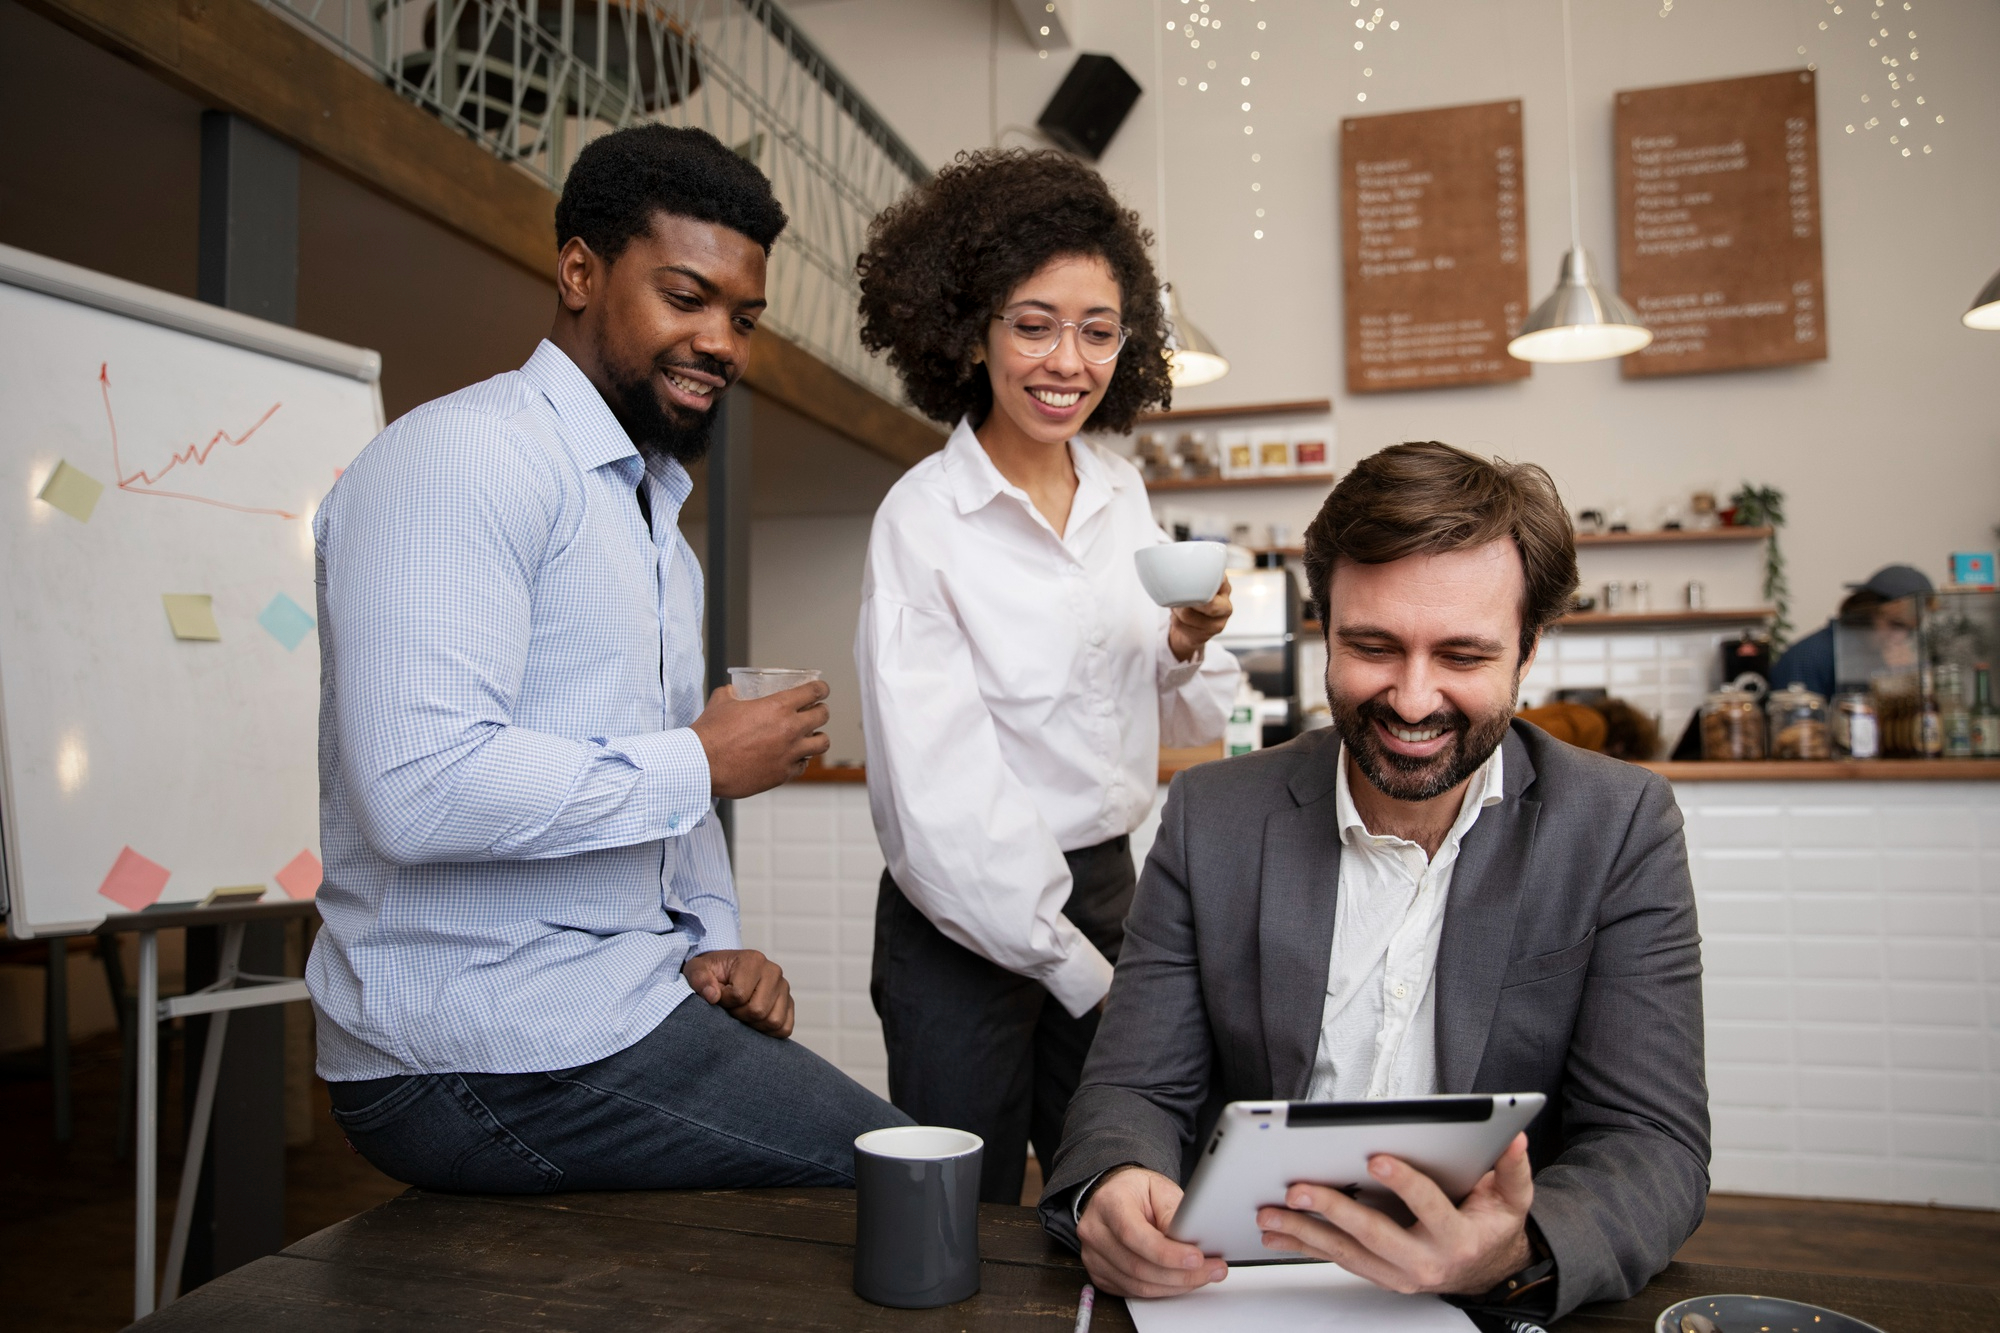

In [7]:
image_pil

In [4]:
zeroshot_modal = modal.Function.from_name("zeroshot-test", "zeroshot_modal")

In [5]:
prompt = ["pants", "cup","tablet"]

In [9]:
predictions = zeroshot_modal.remote(image_pil, prompt)

In [10]:
predictions

[{'score': 0.7017728686332703,
  'label': 'tablet',
  'box': {'xmin': 1161, 'ymin': 1090, 'xmax': 1538, 'ymax': 1262}},
 {'score': 0.42339611053466797,
  'label': 'cup',
  'box': {'xmin': 732, 'ymin': 668, 'xmax': 826, 'ymax': 770}},
 {'score': 0.4088421165943146,
  'label': 'cup',
  'box': {'xmin': 851, 'ymin': 1127, 'xmax': 980, 'ymax': 1310}},
 {'score': 0.39047518372535706,
  'label': 'cup',
  'box': {'xmin': 1136, 'ymin': 541, 'xmax': 1230, 'ymax': 608}},
 {'score': 0.29180216789245605,
  'label': 'cup',
  'box': {'xmin': 725, 'ymin': 667, 'xmax': 821, 'ymax': 701}},
 {'score': 0.28940078616142273,
  'label': 'pants',
  'box': {'xmin': 319, 'ymin': 1028, 'xmax': 906, 'ymax': 1189}},
 {'score': 0.2518768012523651,
  'label': 'cup',
  'box': {'xmin': 1685, 'ymin': 581, 'xmax': 1706, 'ymax': 609}},
 {'score': 0.24155402183532715,
  'label': 'pants',
  'box': {'xmin': 861, 'ymin': 872, 'xmax': 1055, 'ymax': 1097}},
 {'score': 0.22247730195522308,
  'label': 'cup',
  'box': {'xmin': 16